**NAME: GAYATRI NIMBOLKAR**

**LGM VIP FEB 2022**

**INTERMEDIATE LEVEL TASK 1: EXPLORATORY DATA ANALYSIS ON DATASET TERRORISM**

In [6]:
# Importing Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
# Connecting Google Drive with Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Importing Data Set from google drive
import os
os.chdir('/content/drive/My Drive')

In [10]:
# Reading Data set
data=pd.read_csv('/content/globalterrorismdb_0718dist.csv', encoding ='latin1')
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,1.0,Assassination,NaN,NaN,NaN,NaN,14.0,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,6.0,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,1.0,Assassination,NaN,NaN,NaN,NaN,10.0,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,3.0,Bombing/Explosion,NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0.0,NaN,NaN,1.0,1.0,1.0,-9.0,NaN,NaN,0.0,1.0,0.0,7.0,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [11]:
# Describing the data
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,attacktype3_txt,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,gsubname2,gname3,gsubname3,guncertain1,guncertain2,guncertain3,individual,nperps,...,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.210000e+03,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1190.000000,1190.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,232.000000,1209.000000,1209.000000,1209.0,1209.000000,7.000000,0.0,0.0,1209.000000,1161.000000,1204.000000,34.000000,30.000000,32.000000,1.0,1.0,1.0,0.0,0.0,0.0,1209.000000,1.0,0.0,1209.000000,660.000000,...,0.0,0.0,0.0,0.0,1209.000000,1055.000000,55.000000,47.000000,2.000000,2.000000,0.0,0.0,0.0,0.0,1095.000000,575.000000,576.000000,973.000000,574.000000,567.000000,1209.000000,695.000000,3.110000e+02,1209.000000,83.000000,83.000000,32.000000,29.000000,1206.000000,3.800000e+01,0.0,7.000000,0.0,0.0,57.000000,44.000000,1209.000000,1209.000000,1209.000000,1209.000000
mean,1.970593e+11,1970.534711,5.662810,14.782645,0.029752,248.118182,3.382645,34.806398,-59.408396,1.075269,0.005790,0.999173,0.998346,0.914806,-0.530190,1.560345,0.104218,0.859388,0.0,3.837883,4.285714,NaN,NaN,5.617866,34.703704,201.970930,8.852941,47.233333,219.750000,7.0,45.0,161.0,NaN,NaN,NaN,0.068652,1.0,NaN,0.002481,-66.033333,...,NaN,NaN,NaN,NaN,6.738627,15.699526,6.854545,10.021277,9.000000,12.500000,NaN,NaN,NaN,NaN,0.400000,0.076522,0.036458,0.548818,0.315331,0.001764,0.301075,3.187050,1.230074e+05,0.068652,3.746988,-0.771084,1.281250,20.793103,0.031509,1.991316e+05,NaN,116714.285714,NaN,NaN,2.456140,19.954545,-4.604632,-4.496278,0.277916,-3.555831
std,6.215254e+07,0.628153,3.295036,9.185877,0.169973,139.745770,3.410905,20.475755,55.349643,0.529080,0.075902,0.028760,0.040656,0.279286,2.532757,0.506046,0.305670,0.347765,0.0,2.034110,2.563480,NaN,NaN,5.176316,26.224891,62.142825,6.453246,27.692503,12.949032,NaN,NaN,NaN,NaN,NaN,NaN,0.252966,NaN,NaN,0.049772,48.014244,...,NaN,NaN,NaN,NaN,1.955085,7.547933,2.231244,7.505040,5.656854,14.849242,NaN,NaN,NaN,NaN,2.239091,0.340713,0.251030,4.933814,1.867292,0.041996,1.983877,0.435598,4.771338e+05,0.252966,53.421893,11.019191,4.834249,44.567268,0.174762,8.200946e+05,NaN,131347.775372,NaN,NaN,0.946236,49.230806,4.553673,4.680366,0.757206,4.793283
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,11.000000,1.000000,-37.813187,-157.818968,1.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.0,1.000000,2.000000,NaN,NaN,1.000000,1.000000,11.000000,1.000000,1.000000,161.000000,7.0,45.0,161.0,NaN,NaN,NaN,0.000000,1.0,NaN,0.000000,-99.000000,...,NaN,NaN,NaN,NaN,2.000000,1.000000,5.000000,2.000000,5.000000,2.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,2.000000,0.000000e+00,0.000000,-99.000000,-99.000000,0.000000,0.000000,0.000000,0.000000e+00,NaN,12000.000000,NaN,NaN,2.000000,1.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.970053e+11,1970.000000,3.000000,6.000000,0.000000,217.000000,1.000000,34.097866,-95.365295,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.0,3.000000,2.000000,NaN,NaN,2.000000,15.000000,217.000000,3.000000,23.500000,217.000000,7.0,45.0,161.0,NaN,NaN,NaN,0.000000,1.0,NaN,0.000000,-99.000000,...,NaN,NaN,NaN,NaN,6.000000,14.000000,5.000000,3.000000,7.000000,7.250000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [12]:
# Data Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210 entries, 0 to 1209
Columns: 135 entries, eventid to related
dtypes: float64(79), int64(7), object(49)
memory usage: 1.2+ MB


In [13]:
# Data Types
data.dtypes

eventid         int64
iyear           int64
imonth          int64
iday            int64
approxdate     object
               ...   
INT_LOG       float64
INT_IDEO      float64
INT_MISC      float64
INT_ANY       float64
related        object
Length: 135, dtype: object

In [14]:
# Data Set Columns
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [15]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [16]:
# Taking out required Columns for Analysis
data=data[['eventid', 'iyear', 'imonth', 'country', 'region','provstate','city','crit1', 'crit2', 'crit3','success', 'suicide', 'attacktype1','targtype1','natlty1','gname','guncertain1','claimed','weaptype1','nkill','nwound']]
data.head()

,eventid,iyear,imonth,country,region,provstate,city,crit1,crit2,crit3,success,suicide,attacktype1,targtype1,natlty1,gname,guncertain1,claimed,weaptype1,nkill,nwound
0,197000000001,1970,7,58,2,NaN,Santo Domingo,1.0,1.0,1.0,1.0,0.0,1.0,14.0,58.0,MANO-D,0.0,NaN,13.0,1.0,0.0
1,197000000002,1970,0,130,1,Federal,Mexico city,1.0,1.0,1.0,1.0,0.0,6.0,7.0,21.0,23rd of September Communist League,0.0,NaN,13.0,0.0,0.0
2,197001000001,1970,1,160,5,Tarlac,Unknown,1.0,1.0,1.0,1.0,0.0,1.0,10.0,217.0,Unknown,0.0,NaN,13.0,1.0,0.0
3,197001000002,1970,1,78,8,Attica,Athens,1.0,1.0,1.0,1.0,0.0,3.0,7.0,217.0,Unknown,0.0,NaN,6.0,NaN,NaN
4,197001000003,1970,1,101,4,Fukouka,Fukouka,1.0,1.0,1.0,1.0,0.0,7.0,7.0,217.0,Unknown,0.0,NaN,8.0,NaN,NaN


In [17]:
# Returning Number of Missing values
data.isnull().sum()

eventid          0
iyear            0
imonth           0
country          0
region           0
provstate        2
city             0
crit1            1
crit2            1
crit3            1
success          1
suicide          1
attacktype1      1
targtype1        1
natlty1          6
gname            1
guncertain1      1
claimed        668
weaptype1        1
nkill          115
nwound         237
dtype: int64

In [18]:
# Combining Two Columns i.e., 'nkill' and 'nwound' into a new column 'casualities'
data['nkill']=data['nkill'].fillna(0)
data['nwound']=data['nwound'].fillna(0)
data['casualities']=data['nkill']+data['nwound']
data.isnull().sum()

eventid          0
iyear            0
imonth           0
country          0
region           0
provstate        2
city             0
crit1            1
crit2            1
crit3            1
success          1
suicide          1
attacktype1      1
targtype1        1
natlty1          6
gname            1
guncertain1      1
claimed        668
weaptype1        1
nkill            0
nwound           0
casualities      0
dtype: int64

In [19]:
data.describe()

,eventid,iyear,imonth,country,region,crit1,crit2,crit3,success,suicide,attacktype1,targtype1,natlty1,guncertain1,claimed,weaptype1,nkill,nwound,casualities
count,1.210000e+03,1210.000000,1210.000000,1210.000000,1210.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.0,1209.000000,1209.000000,1204.000000,1209.000000,542.000000,1209.000000,1210.000000,1210.000000,1210.000000
mean,1.970593e+11,1970.534711,5.662810,248.118182,3.382645,0.999173,0.998346,0.914806,0.859388,0.0,3.837883,5.617866,201.970930,0.068652,0.121771,6.738627,0.361983,0.441322,0.803306
std,6.215254e+07,0.628153,3.295036,139.745770,3.410905,0.028760,0.040656,0.279286,0.347765,0.0,2.034110,5.176316,62.142825,0.252966,0.327323,1.955085,2.133170,4.429237,5.008445
min,1.970000e+11,1970.000000,0.000000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,11.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,1.970053e+11,1970.000000,3.000000,217.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,3.000000,2.000000,217.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,1.970112e+11,1970.000000,5.000000,217.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,3.000000,4.000000,217.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000
75%,1.971061e+11,1971.000000,8.000000,217.000000,8.000000,1.000000,1.000000,1.000000,1.000000,0.0,6.000000,8.000000,217.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000
max,1.972032e+11,1972.000000,12.000000,603.000000,12.000000,1.000000,1.000000,1.000000,1.000000,0.0,9.000000,22.000000,999.000000,1.000000,1.000000,13.000000,47.000000,130.000000,132.000000


In [20]:
print(f"""
There are {data.country.nunique()} Countries from {data.region.nunique()} Regions covered in the dataset terrorist attack data in {data.claimed.nunique()} years from {data.iyear.min()} to {data.iyear.max()}. Overall {data.index.nunique()} terrorist attacks are recorded here which caused about {data.casualities.sum()} Casualities Consisted of {data.nkill.sum()} Kills and {data.nwound.sum()} Wounded.
""")


There are 47 Countries from 11 Regions covered in the dataset terrorist attack data in 2 years from 1970 to 1972. Overall 1210 terrorist attacks are recorded here which caused about 972.0 Casualities Consisted of 438.0 Kills and 534.0 Wounded.



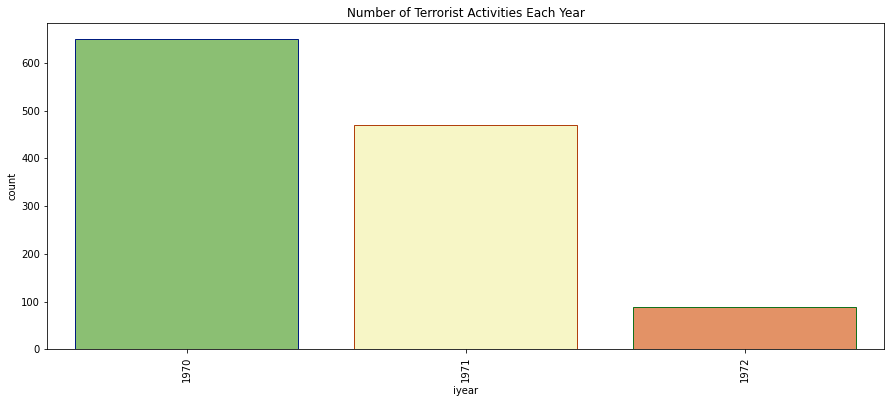

In [21]:
plt.subplots(figsize=(15,6))
sns.countplot('iyear', data=data, palette='RdYlGn_r', edgecolor=sns.color_palette('dark', 10))
plt.xticks(rotation = 90)
plt.title("Number of Terrorist Activities Each Year")
plt.show()

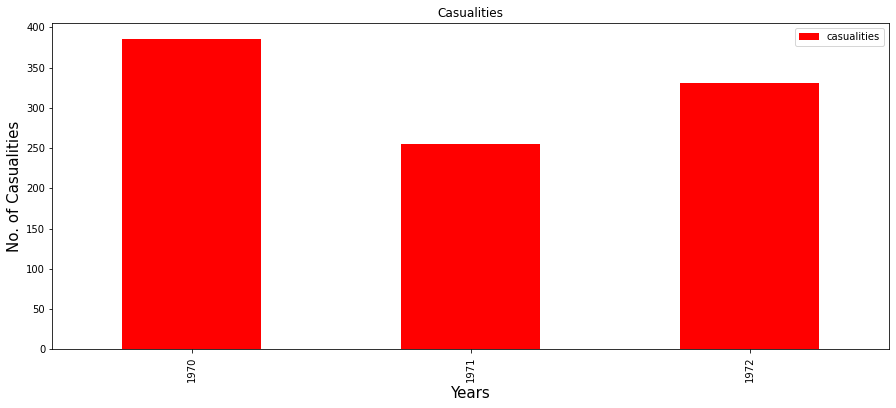

In [22]:
yearc=data[['iyear','casualities']].groupby('iyear').sum()
yearc.plot(kind='bar',color='red',figsize=(15,6))
plt.title("Casualities")
plt.xlabel('Years',fontsize=15)
plt.ylabel('No. of Casualities',fontsize=15)
plt.show()

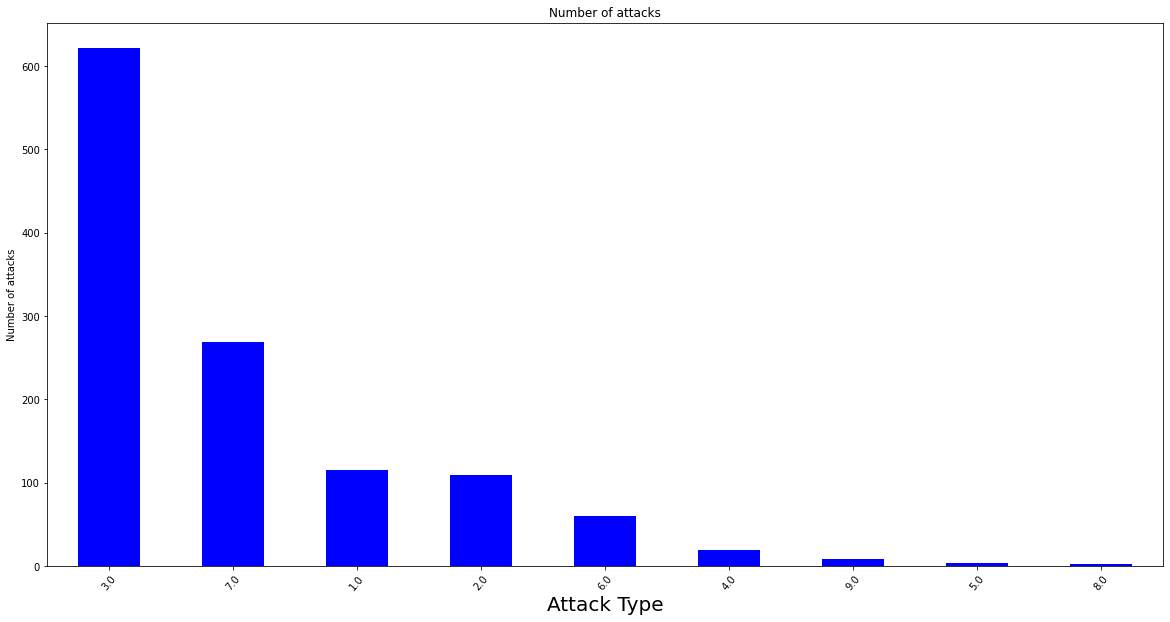

In [23]:
data['attacktype1'].value_counts().plot(kind='bar',figsize=(20,10),color='blue')
plt.xticks(rotation=50)
plt.xlabel('Attack Type',fontsize=20)
plt.ylabel('Number of attacks')
plt.title('Number of attacks')
plt.show()

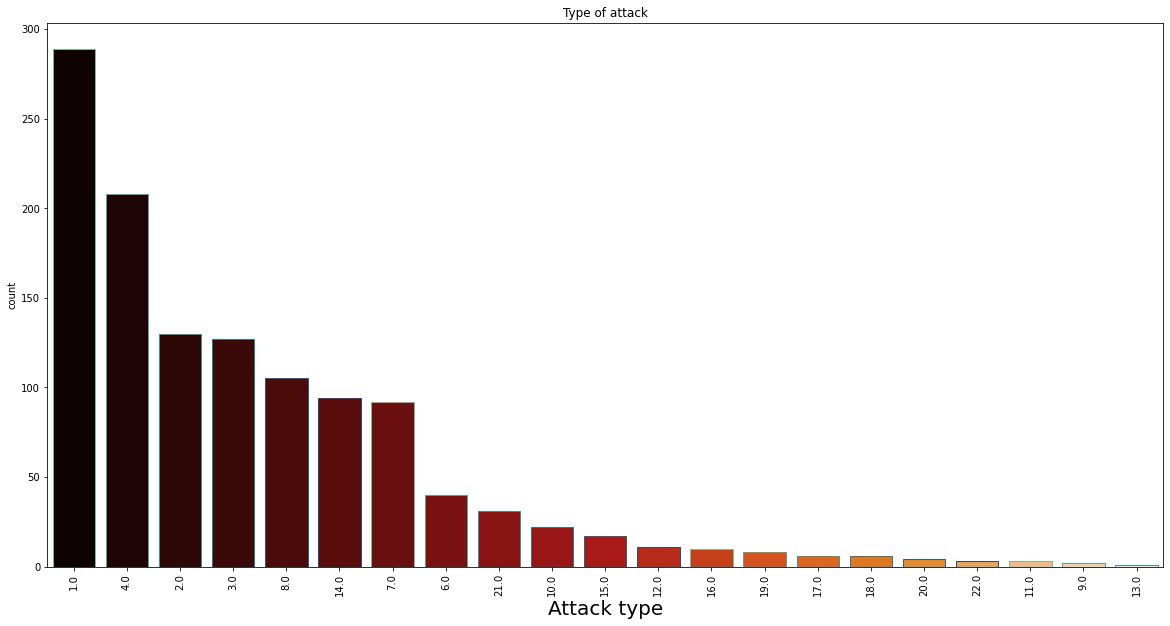

In [24]:
plt.subplots(figsize=(20,10))
sns.countplot(data['targtype1'],order=data['targtype1'].value_counts().index,palette='gist_heat',edgecolor=sns.color_palette("crest"));
plt.xticks(rotation=90)
plt.xlabel('Attack type',fontsize=20)
plt.ylabel('count')
plt.title('Type of attack')
plt.show()

In [26]:
sattk=data.success.value_counts()[:10]
sattk

Series([], Name: success, dtype: int64)

In [27]:
data.gname.value_counts()[1:11]

Left-Wing Militants                                 165
Irish Republican Army (IRA)                          95
Black Nationalists                                   82
Student Radicals                                     70
Tupamaros (Uruguay)                                  41
White extremists                                     39
Weather Underground, Weathermen                      33
Turkish People's Liberation Army                     30
Chicano Liberation Front                             26
Armed Revolutionary Independence Movement (MIRA)     26
Name: gname, dtype: int64